# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 100 total reviews
Scraping page 2


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 200 total reviews
Scraping page 3


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 300 total reviews
Scraping page 4


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 400 total reviews
Scraping page 5


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 500 total reviews
Scraping page 6


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 600 total reviews
Scraping page 7


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 700 total reviews
Scraping page 8


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 800 total reviews
Scraping page 9


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 900 total reviews
Scraping page 10


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1000 total reviews


C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\860424838.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [4]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
159,Family Leisure,Economy Class,London to Lyon,February 2023,1.0,4.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | Delayed just for a change. ...
885,Business,Business Class,New York to Venice via London,February 2019,1.0,2.0,1.0,4.0,1.0,2.0,1,no,NaN,✅ Trip Verified | New York to Venice via Lond...
32,Solo Leisure,Economy Class,Seattle to London Heathrow,June 2023,2.0,2.0,1.0,3.0,3.0,NaN,3,no,Boeing 787,✅ Trip Verified | I don't understand why Brit...
585,Couple Leisure,Business Class,Keflavik to London Heathrow,January 2020,3.0,5.0,5.0,NaN,4.0,NaN,5,yes,A320,Not Verified | Keflavik to London Heathrow. Ca...
665,Business,Economy Class,London to Athens,October 2019,3.0,2.0,NaN,NaN,4.0,NaN,2,no,A320,✅ Trip Verified | London to Athens. British Ai...


In [5]:
df.to_csv("BA_reviews.csv", index=False)

In [6]:
df = pd.read_csv('BA_reviews.csv')

Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

In [7]:
df.shape

(1000, 14)

In [8]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11184\422421243.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [9]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
37,Solo Leisure,Economy Class,Amman to London,July 2023,3.0,1.0,1.0,1.0,4.0,3.0,3,no,A320Neo,| Horrible airline. Does not care about their ...
385,Family Leisure,Business Class,London to Porto,February 2022,NaN,NaN,NaN,NaN,NaN,NaN,1,no,NaN,| Appalling customer service - they have can...
308,Business,Economy Class,London to Boston,May 2022,4.0,5.0,5.0,NaN,5.0,5.0,3,yes,Boeing 777-300ER,"| Recent trip to Boston, departing LHR T5. G..."
552,Solo Leisure,Economy Class,Johannesburg to Dublin via London,February 2020,1.0,1.0,NaN,NaN,1.0,NaN,1,no,NaN,| Johannesburg to Dublin via London. I get t...
681,Couple Leisure,Premium Economy,London to Kuala Lumpur,August 2019,5.0,4.0,3.0,4.0,4.0,4.0,4,yes,Boeing 787,| London to Kuala Lumpur. Better than I was ...


# Analysis Data

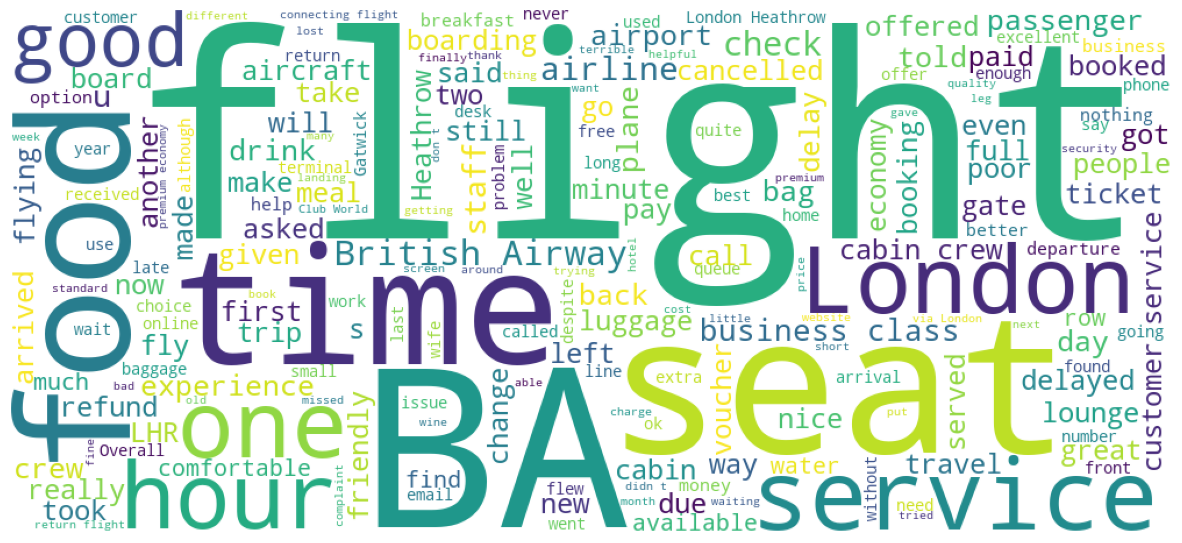

In [10]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time. showing that people are actively talking about their experience on the plane and the staff.

# Satisfaction of customer

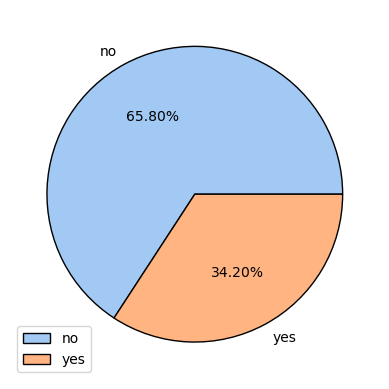

In [11]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

From the pie chart above, we know that 65.8% of passengers are dissatisfied with British Airways services. let's breakdown the data to found what make passengers dissatisfied :

# View rating of BA service by passenger that dissatisfied with British Airways

In [12]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,575.000000,569.000000,471.000000,328.000000,602.000000,175.000000,658.000000
mean,2.104348,2.413005,1.859873,2.143293,1.880399,1.480000,1.548632
std,1.094601,1.317504,1.064666,1.239346,1.204117,0.957967,0.843043
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Analysis food on airways

In [13]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

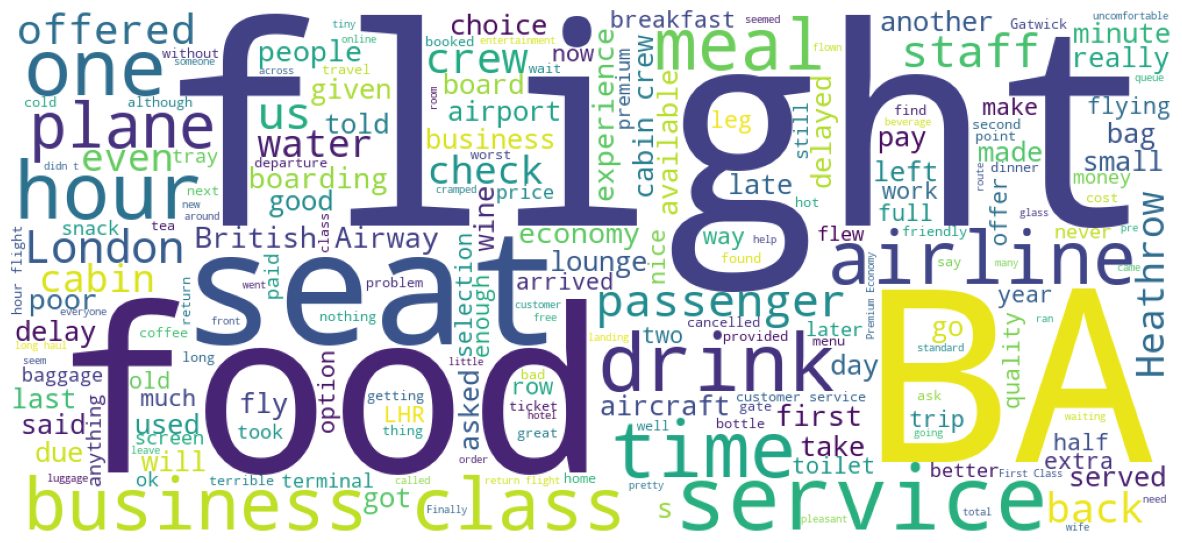

In [14]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

I analyse the test.csv file, and get information that :

    1.Time to deliver the order is too long
    2.For free catering just bottle of water and a packet of crisps
    3.Minimal selection of food items for purchase.

# Analysis value for money

In [15]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

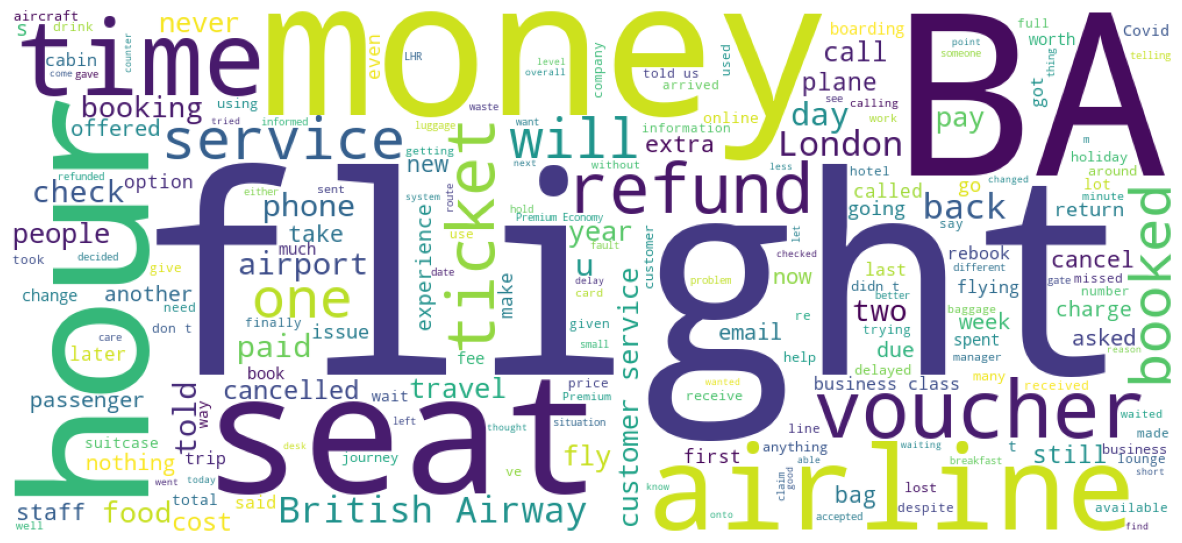

In [16]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

what I get from analysis the data :

    1.The refund take a lot of time
    2.Forced to use of vouchers however it was useless
    3.Long delay time